In [1]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
from __future__ import print_function
from keras.optimizers import SGD,RMSprop,Adam
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
IMG_CHANNEL = 10
IMG_ROW = 32
IMG_COL = 32
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = RMSprop()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print(x_train.shape,"\n",x_test.shape,"\n",y_train.shape,"\n",y_test.shape)

(50000, 32, 32, 3) 
 (10000, 32, 32, 3) 
 (50000, 1) 
 (10000, 1)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test/=255.0

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)


In [6]:
model = Sequential()

#step 1
model.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#step 2
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [7]:
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
fit = model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 79s 2ms/step - loss: 1.6580 - acc: 0.4152 - val_loss: 1.4551 - val_acc: 0.4801
Epoch 2/20
40000/40000 [==============================] - 78s 2ms/step - loss: 1.3061 - acc: 0.5358 - val_loss: 1.4855 - val_acc: 0.4844
Epoch 3/20
40000/40000 [==============================] - 78s 2ms/step - loss: 1.1628 - acc: 0.5923 - val_loss: 1.2318 - val_acc: 0.5686
Epoch 4/20
40000/40000 [==============================] - 78s 2ms/step - loss: 1.0567 - acc: 0.6267 - val_loss: 1.1002 - val_acc: 0.6156
Epoch 5/20
40000/40000 [==============================] - 78s 2ms/step - loss: 0.9724 - acc: 0.6608 - val_loss: 1.0680 - val_acc: 0.6324
Epoch 6/20
40000/40000 [==============================] - 78s 2ms/step - loss: 0.9003 - acc: 0.6851 - val_loss: 1.0833 - val_acc: 0.6243
Epoch 7/20
40000/40000 [==============================] - 78s 2ms/step - loss: 0.8297 - acc: 0.7115 - val_loss: 1.0023 - val_acc

10000/10000 [==============================] - 7s 739us/step
Test Score:  1.2286447751998901 
Test Accuracy  0.6668
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


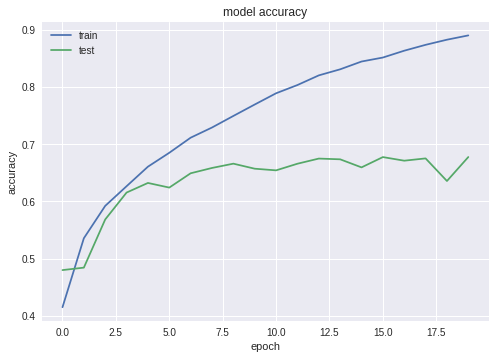

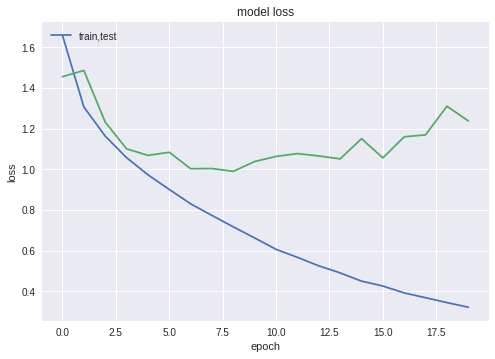

In [8]:
score = model.evaluate(x_test,y_test,verbose=VERBOSE)
print("Test Score: ",score[0],"\nTest Accuracy ",score[1])
print (fit.history.keys())
plt.plot(fit.history['acc'])
plt.plot(fit.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(fit.history['loss'])
plt.plot(fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train,test'],loc='upper left')
plt.show()
